In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from scipy import stats
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error
from statsmodels import graphics

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

In [11]:
#Se cargan los archivos 

total=pd.read_excel("GLM.xlsx",index_col=0) 
total

,PERMANENTE,PROD_NAL,OBRERO,TOTPERSONAL,COSTOS_PT_ELAB_TERCEROS,TOTAL_OUTSOURCING,TOT_MUESTRASGRATIS,PUBLICIDAD_PROD,GASTOSCARTERA,TOTALGASTOS_USOPROPIO,INVER_MAQ,INVER_OFICINA,TOTALINVER,VALORACTIVOS,MPCOMPRADA,VENTAS
1,2.000000,2.000000,10.0,13.0,1.789890e+05,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,641984.0,2602400.0,3460300.0
2,7.000000,12.562613,3.0,9.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,4478.000000,49702.437665,53869.000000,201817.0,102941.0,296411.0
3,46.562075,1.000000,30.0,36.0,2.726740e+05,4464.000000,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,3200.000000,3200.000000,143460.0,867491.0,1597520.0
4,46.562075,2.000000,3.0,5.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,8704.0,26720.0,231480.0
5,19.000000,12.562613,15.0,19.0,3.154950e+05,218224.843465,47359.806799,22549.880305,8.969314e+06,541844.380952,39292.000000,13033.000000,527797.000000,1598624.0,1548929.0,3451232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,11.000000,3.000000,4.0,11.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,93659.0,155361.0,907882.0
10292,46.562075,12.562613,27.0,46.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,11182.000000,188741.0,618268.0,1100444.0
10293,40.000000,12.562613,29.0,46.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,465071.0,2164604.0,3300208.0
10294,36.000000,9.000000,260.0,303.0,6.470340e+05,218224.843465,47359.806799,22549.880305,2.444700e+04,568773.225613,118002.000000,49702.437665,503083.000000,2874293.0,6940062.0,15443532.0


In [12]:
#Eliminar valores faltantes del conjunto de datos

total=total.dropna()

Las variables endógenas son equivalentes a la variable dependiente, mientras que las variables exógenas lo son para las variables independientes

In [15]:
#Definir variables exógenas

x=total[["PERMANENTE","PROD_NAL", "OBRERO", "TOTPERSONAL", "COSTOS_PT_ELAB_TERCEROS","TOTAL_OUTSOURCING", "TOT_MUESTRASGRATIS", "PUBLICIDAD_PROD", "GASTOSCARTERA", "TOTALGASTOS_USOPROPIO", "INVER_MAQ", "INVER_OFICINA", "TOTALINVER", "VALORACTIVOS", "MPCOMPRADA"]]

In [29]:
#Definir variable endógena

y1=total[["VENTAS"]]

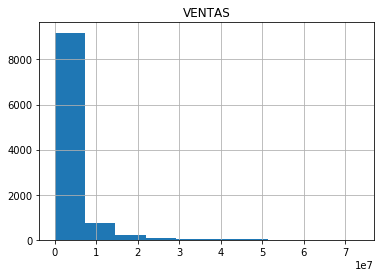

In [30]:
Respuesta=["VENTAS"]
total.hist(Respuesta);

In [31]:
glm_binom=sm.GLM(y1,x,family=sm.families.Binomial()) # En este caso se asume una regresión binomial en la familia
res= glm_binom.fit()  # Se ajustan el modelo
print(res.summary()) # Se muestra la salida para el modelo utilizado

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 VENTAS   No. Observations:                10295
Model:                            GLM   Df Residuals:                    10280
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 21 Jan 2019   Deviance:                          inf
Time:                        19:03:14   Pearson chi2:                 1.84e+33
No. Iterations:                     2   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
PERMANENTE               3.507e+19    2.4e+04   1.46e+15      0.000    3.51e+19    3.51e+19
PROD_NAL     

In [23]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 VENTAS   No. Observations:                10295
Model:                            GLM   Df Residuals:                    10280
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 21 Jan 2019   Deviance:                          inf
Time:                        19:00:38   Pearson chi2:                 1.84e+33
No. Iterations:                     2   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
PERMANENTE               3.507e+19    2.4e+04   1.46e+15      0.000    3.51e+19    3.51e+19
PROD_NAL                 1.388e+20   1.09e+05   1.27e+15      0.000    1.39e+20    1.39e+20
OBRERO                  -9.572e+19   3.61e+04  -2.65e+15      0.000   -9.57e+19   -9.57e+19
TOTPERSONAL              2.155e+20   3.17e+04    6.8e+15      0.000    2.15e+20    2.15e+20
COSTOS_PT_ELAB_TERCEROS  4.338e+15      0.850    5.1e+15      0.000    4.34e+15    4.34e+15
TOTAL_OUTSOURCING        4.976e+15      8.189   6.08e+14      0.000    4.98e+15    4.98e+15
TOT_MUESTRASGRATIS      -8.523e+16     60.591  -1.41e+15      0.000   -8.52e+16   -8.52e+16
PUBLICIDAD_PROD          1.188e+17     92.570   1.28e+15      0.000    1.19e+17    1.19e+17
GASTOSCARTERA           -5.107e+14      0.197   -2.6e+15      0.000   -5.11e+14   -5.11e+14
TOTALGASTOS_USOPROPIO    -3.19e+15      7.198  -4.43e+14      0.000   -3.19e+15   -3.19e+15
INVER_MAQ                7.383e+15      4.528   1.63e+15      0.000    7.38e+15    7.38e+15
INVER_OFICINA            1.056e+16     28.729   3.67e+14      0.000    1.06e+16    1.06e+16
TOTALINVER              -7.692e+14      3.326  -2.31e+14      0.000   -7.69e+14   -7.69e+14
VALORACTIVOS             8.924e+14      0.222   4.02e+15      0.000    8.92e+14    8.92e+14
MPCOMPRADA               8.721e+15      0.358   2.43e+16      0.000    8.72e+15    8.72e+15
===========================================================================================
"""

Se definen las variables significativas de acuerdo al valor p, para este caso todas las variables son significativas

In [25]:
print('Total number of trials:',  y.sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: VENTAS    3.259936e+10
dtype: float64
Parameters:  PERMANENTE                 3.507085e+19
PROD_NAL                   1.388198e+20
OBRERO                    -9.572024e+19
TOTPERSONAL                2.154656e+20
COSTOS_PT_ELAB_TERCEROS    4.337677e+15
                               ...     
INVER_MAQ                  7.382899e+15
INVER_OFICINA              1.055767e+16
TOTALINVER                -7.692313e+14
VALORACTIVOS               8.923540e+14
MPCOMPRADA                 8.720873e+15
Length: 15, dtype: float64
T-values:  PERMANENTE                 1.460341e+15
PROD_NAL                   1.268864e+15
OBRERO                    -2.653544e+15
TOTPERSONAL                6.803450e+15
COSTOS_PT_ELAB_TERCEROS    5.102107e+15
                               ...     
INVER_MAQ                  1.630467e+15
INVER_OFICINA              3.674960e+14
TOTALINVER                -2.313126e+14
VALORACTIVOS               4.017150e+15
MPCOMPRADA                 2.434765e+16
Length:

## Plots

In [39]:
#NO ESTAMOS SEGURAS DE ESTA PARTE

nobs = res.nobs
y = y1.values[:,0]/y1.values.sum(1) # Como se tomó la familia binomial se hace la transformación de la variable respuesta observada
yhat = res.mu # Valores pronósticados

In [40]:
r2_score(y1,yhat) # Estimación del R_2 

-0.337213145291529

Plots yhat vs y

In [41]:
from statsmodels.graphics.api import abline_plot # Función para graficar linea de distribución

En este gráfico se comparan los valores observados y los pronósticados con el objetivos de evaluar que tan bueno es el ajuste del modelo propuesto

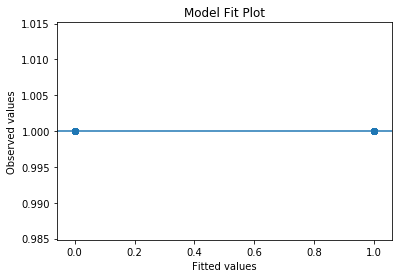

In [42]:
fig,ax=plt.subplots()
ax.scatter(yhat,y)
line_fit=sm.OLS(y,sm.add_constant(yhat,prepend=True)).fit()
abline_plot(model_results=line_fit,ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Histograma de desviaciones estandarizadas

ValueError: max must be larger than min in range parameter.

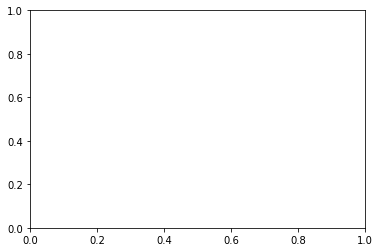

In [45]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=5)
ax.set_title('Histograma de desviaciones estandarizadas');

C:\Users\Invitado\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:195: RuntimeWarning: invalid value encountered in subtract
  scale = np.sqrt(((data - loc)**2).mean())


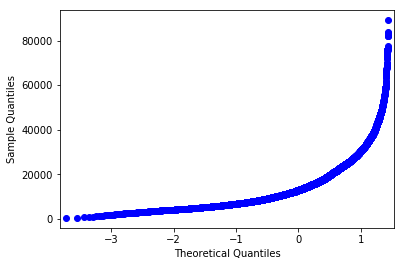

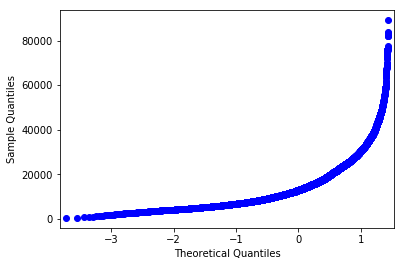

In [46]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

# GLM: Distribución Gamma

In [47]:
#Se cargan los archivos 

total2=pd.read_excel("GLM.xlsx",index_col=0) 
total2

,PERMANENTE,PROD_NAL,OBRERO,TOTPERSONAL,COSTOS_PT_ELAB_TERCEROS,TOTAL_OUTSOURCING,TOT_MUESTRASGRATIS,PUBLICIDAD_PROD,GASTOSCARTERA,TOTALGASTOS_USOPROPIO,INVER_MAQ,INVER_OFICINA,TOTALINVER,VALORACTIVOS,MPCOMPRADA,VENTAS
1,2.000000,2.000000,10.0,13.0,1.789890e+05,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,641984.0,2602400.0,3460300.0
2,7.000000,12.562613,3.0,9.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,4478.000000,49702.437665,53869.000000,201817.0,102941.0,296411.0
3,46.562075,1.000000,30.0,36.0,2.726740e+05,4464.000000,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,3200.000000,3200.000000,143460.0,867491.0,1597520.0
4,46.562075,2.000000,3.0,5.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,8704.0,26720.0,231480.0
5,19.000000,12.562613,15.0,19.0,3.154950e+05,218224.843465,47359.806799,22549.880305,8.969314e+06,541844.380952,39292.000000,13033.000000,527797.000000,1598624.0,1548929.0,3451232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,11.000000,3.000000,4.0,11.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,93659.0,155361.0,907882.0
10292,46.562075,12.562613,27.0,46.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,11182.000000,188741.0,618268.0,1100444.0
10293,40.000000,12.562613,29.0,46.0,1.158180e+06,218224.843465,47359.806799,22549.880305,8.969314e+06,568773.225613,340794.846346,49702.437665,493915.398347,465071.0,2164604.0,3300208.0
10294,36.000000,9.000000,260.0,303.0,6.470340e+05,218224.843465,47359.806799,22549.880305,2.444700e+04,568773.225613,118002.000000,49702.437665,503083.000000,2874293.0,6940062.0,15443532.0


In [54]:
#Definir variables exógenas

x2=total2[["PERMANENTE","PROD_NAL", "OBRERO", "TOTPERSONAL", "COSTOS_PT_ELAB_TERCEROS","TOTAL_OUTSOURCING", "TOT_MUESTRASGRATIS", "PUBLICIDAD_PROD", "GASTOSCARTERA", "TOTALGASTOS_USOPROPIO", "INVER_MAQ", "INVER_OFICINA", "TOTALINVER", "VALORACTIVOS", "MPCOMPRADA"]]

In [55]:
#Definir variable endógena

y2=total2[["VENTAS"]]

 ### Ajustar

In [50]:
sm.families.Gamma

statsmodels.genmod.families.family.Gamma

In [56]:
glm_gamma=sm.GLM(y2,x2,family=sm.families.Gamma())
glm_results=glm_gamma.fit()
print(glm_results.summary())

C:\Users\Invitado\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 VENTAS   No. Observations:                10295
Model:                            GLM   Df Residuals:                    10280
Model Family:                   Gamma   Df Model:                           14
Link Function:          inverse_power   Scale:                          15.278
Method:                          IRLS   Log-Likelihood:            -1.7664e+05
Date:                Mon, 21 Jan 2019   Deviance:                       21413.
Time:                        19:17:37   Pearson chi2:                 1.57e+05
No. Iterations:                    59   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
PERMANENTE              -1.146e-09   4.91e-11    -23.365      0.000   -1.24e-09   -1.05e-09
PROD_NAL     

In [57]:
nobs = glm_results.nobs
y = y2
yhat = glm_results.mu

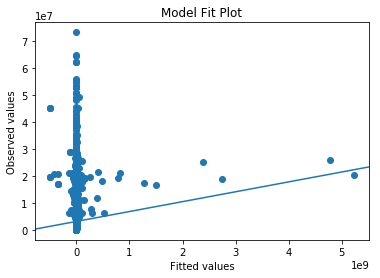

In [58]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [59]:
r2_score(y,yhat)

-233.6408612301203

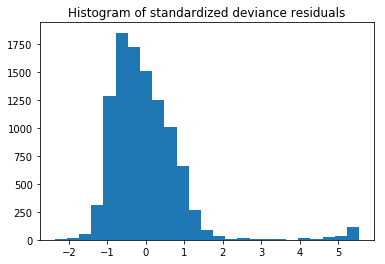

In [60]:
from scipy import stats

fig, ax = plt.subplots()

resid = glm_results.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

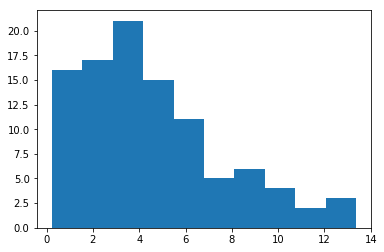

In [61]:
x=np.random.gamma(2,2,100)
plt.hist(x);